In [ ]:
!git clone https://github.com/billyhjm/PHM_Education.git

In [ ]:
cd /content/PHM_Education

# Filtering, FFT, Envelope 실습

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import hilbert
import z_dependancy as z_dep
plt.rc('font', size=20)

# 데이터 로드

## 회전 주파수 알아보기

In [2]:
F_shaft_rpm = 1797
F_shaft = F_shaft_rpm/60
print('Shaft Frequency is', F_shaft)

Shaft Frequency is 29.95


## 베어링 주파수 DB 만들기

In [3]:
F_BPFI = 5.4152
F_BPFO = 3.5848
F_FTF = 0.398
F_BSF = 4.7135

F_BPFI_w = F_BPFI*F_shaft
F_BPFO_w = F_BPFO*F_shaft
F_FTF_w = F_FTF*F_shaft
F_BSF_w = F_BSF*F_shaft

print('Outer Race Fault Frequency is', F_BPFO_w)

Outer Race Fault Frequency is 107.36476


## 신호 로드하고 그려보기

### 신호 로드하기

In [4]:
fs=12000
data = np.array(pd.read_csv('./data/data_normal.csv'))
print(np.shape(data))
print(data)
v_n = data[:,1]

(243938, 2)
[[0.00000000e+00 1.45667273e-01]
 [1.00000000e+00 9.77963636e-02]
 [2.00000000e+00 5.48563636e-02]
 ...
 [2.43935000e+05 1.40530909e-01]
 [2.43936000e+05 9.55363636e-02]
 [2.43937000e+05 9.01945455e-02]]


In [5]:
data = np.array(pd.read_csv('./data/data_fault.csv'))
print(np.shape(data))
print(data)
v_f = data[:,1]

(121846, 2)
[[ 0.00000000e+00  2.27353293e-03]
 [ 1.00000000e+00 -1.04947904e-01]
 [ 2.00000000e+00  8.20095808e-02]
 ...
 [ 1.21843000e+05 -1.12377485e-01]
 [ 1.21844000e+05 -8.52980838e-02]
 [ 1.21845000e+05 -2.62674251e-02]]


### 신호 그리기

(-4.0, 4.0)

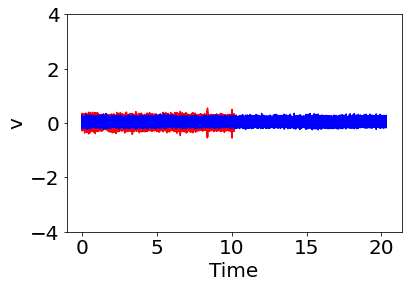

In [6]:
T_n = len(v_n)/fs               # 전체 샘플수 / 1초당 샘플수 = 총 시간
t_n=np.arange(1/fs, T_n, 1/fs)  # 1/fs초 부터 T초까지 1/fs초 간격
T_f = len(v_f)/fs
t_f = np.arange(1/fs, T_f, 1/fs)

plt.figure()
plt.plot(t_f,v_f,'r')
plt.plot(t_n,v_n,'b')
plt.xlabel('Time')
plt.ylabel('v')
plt.ylim([-4,4])

## 주파수 분석해보기

In [7]:
f_n, A_n = z_dep.z_fft_simple(v_n,fs)
f_f, A_f = z_dep.z_fft_simple(v_f,fs)

(0.0, 0.06)

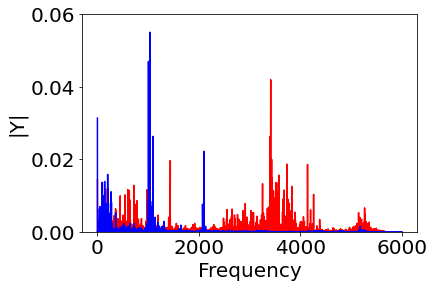

In [8]:
plt.figure()
plt.plot(f_f,A_f,'r')
plt.plot(f_n,A_n,'b')
plt.xlabel('Frequency')
plt.ylabel('|Y|')
plt.ylim([0,0.06])

## 필터링 해보기

### 정상, 고장 신호에 대해 필터링 수행

In [9]:
ftype='band'
Wn=np.array([2500,4500])
print(Wn)
v_filter_n = z_dep.filtering(v_n, fs, Wn, ftype)
v_filter_f = z_dep.filtering(v_f, fs, Wn, ftype)

[2500 4500]


### 결과 Plot

(-4.0, 4.0)

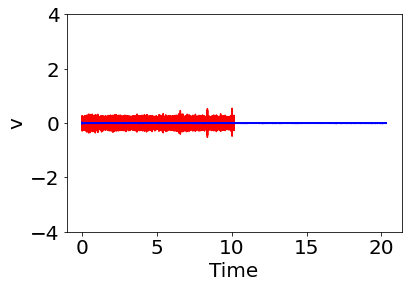

In [10]:
plt.figure()
plt.plot(t_f,v_filter_f,'r')
plt.plot(t_n,v_filter_n,'b')
plt.xlabel('Time')
plt.ylabel('v')
plt.ylim([-4,4])

### 필터링 결과에 대한 주파수 분석

In [11]:
f_filter_n, A_filter_n = z_dep.z_fft_simple(v_filter_n,fs)
f_filter_f, A_filter_f = z_dep.z_fft_simple(v_filter_f,fs)

(0.0, 0.06)

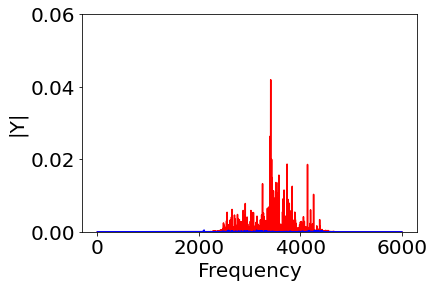

In [12]:
plt.figure()
plt.plot(f_filter_f,A_filter_f,'r')
plt.plot(f_filter_n,A_filter_n,'b')
plt.xlabel('Frequency')
plt.ylabel('|Y|')
plt.ylim([0,0.06])

## 포락선 분석해보기

### 정상, 고장 신호에 대해 포락선 분석

In [13]:
v_filter_env_n = abs(hilbert(v_filter_n,axis=0));
v_filter_env_f = abs(hilbert(v_filter_f,axis=0));

### 포락선 대한 주파수 분석

In [14]:
[f_filter_env_n, A_filter_env_n] = z_dep.z_fft_simple(v_filter_env_n-np.mean(v_filter_env_n),fs);
[f_filter_env_f, A_filter_env_f] = z_dep.z_fft_simple(v_filter_env_f-np.mean(v_filter_env_f),fs);

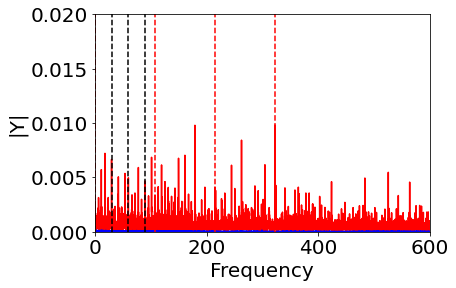

In [15]:
plt.figure()
plt.plot(f_filter_env_f,A_filter_env_f,'r')
plt.plot(f_filter_env_n,A_filter_env_n,'b')
plt.xlabel('Frequency')
plt.ylabel('|Y|')
plt.axis([0,600,0,0.02])

for n in range(4):
    plt.axvline(n*F_shaft, color='k', linestyle='dashed')
    plt.axvline(n*F_BPFO_w, color='r', linestyle='dashed')